In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Load dataset
filename = 'Data/CapstoneLegalData.csv'
dataset = read_csv(filename)

In [3]:
dataset.head()

,PronoteValid,Decree,DecreeWithCost,DecreeWithInterest,InterestAwarded,DecretalAmount,OriginalPronoteAvailable,PronotePhotocopySubmitted,PronoteDate,CaseFilingDate,...,DefendFinance,DefendLegal,CourtJurisdiction,Limitation,Relative,PlaintNumCite,DefendNumCite,JudgeNumCite,PlaintQuoteNumCite,DefendQuoteNumCite
0,1,2,1,1.0,16.00,9000,1,NaN,10-10-2015,2016,...,0,1,NaN,NaN,NaN,0,0,2,0,0
1,1,1,1,NaN,16.00,10000,1,NaN,10-12-2013,2015,...,0,1,NaN,NaN,NaN,0,0,0,0,0
2,1,1,1,1.0,8.00,20000,1,NaN,05-03-2014,2016,...,0,1,NaN,NaN,NaN,0,0,0,0,0
3,1,2,1,1.0,12.23,36851,2,NaN,02-06-2011,2017,...,0,1,NaN,NaN,NaN,0,0,0,0,0
4,1,1,1,1.0,6.00,77557,1,NaN,NaN,28-01-2016,...,0,1,NaN,NaN,NaN,3,0,0,0,0


In [4]:
print(dataset.shape)

(29, 61)


In [5]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

       PronoteValid  Decree  DecreeWithCost  DecreeWithInterest  \
count          29.0    29.0            29.0                28.0   
mean            1.0     1.1             0.6                 0.5   
std             0.2     0.9             0.5                 0.5   
min             0.0     0.0             0.0                 0.0   
25%             1.0     0.0             0.0                 0.0   
50%             1.0     1.0             1.0                 0.5   
75%             1.0     2.0             1.0                 1.0   
max             1.0     2.0             1.0                 1.0   

       InterestAwarded  DecretalAmount  OriginalPronoteAvailable  \
count             29.0         2.9e+01                      29.0   
mean               4.6         4.8e+05                       0.9   
std                5.9         8.0e+05                       0.6   
min                0.0         0.0e+00                       0.0   
25%                0.0         0.0e+00                  

In [6]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

                           PronoteValid    Decree  DecreeWithCost  \
PronoteValid                   1.00e+00  2.33e-01            0.24   
Decree                         2.33e-01  1.00e+00            0.80   
DecreeWithCost                 2.42e-01  7.99e-01            1.00   
DecreeWithInterest             1.92e-01  6.47e-01            0.80   
InterestAwarded                1.49e-01  4.77e-01            0.62   
DecretalAmount                 1.15e-01  4.17e-01            0.45   
OriginalPronoteAvailable      -2.23e-02  2.82e-01            0.40   
PronotePhotocopySubmitted           NaN  5.00e-01            1.00   
PlaitiffLicensedLender         1.22e-01  6.53e-02            0.18   
RefusedSummons                 1.07e-01  3.26e-01            0.44   
SignDisputed                  -4.71e-01  8.25e-02            0.12   
ThumbImp                            NaN       NaN             NaN   
NumAttestors                        NaN  1.86e-01            0.26   
NumExamined                       

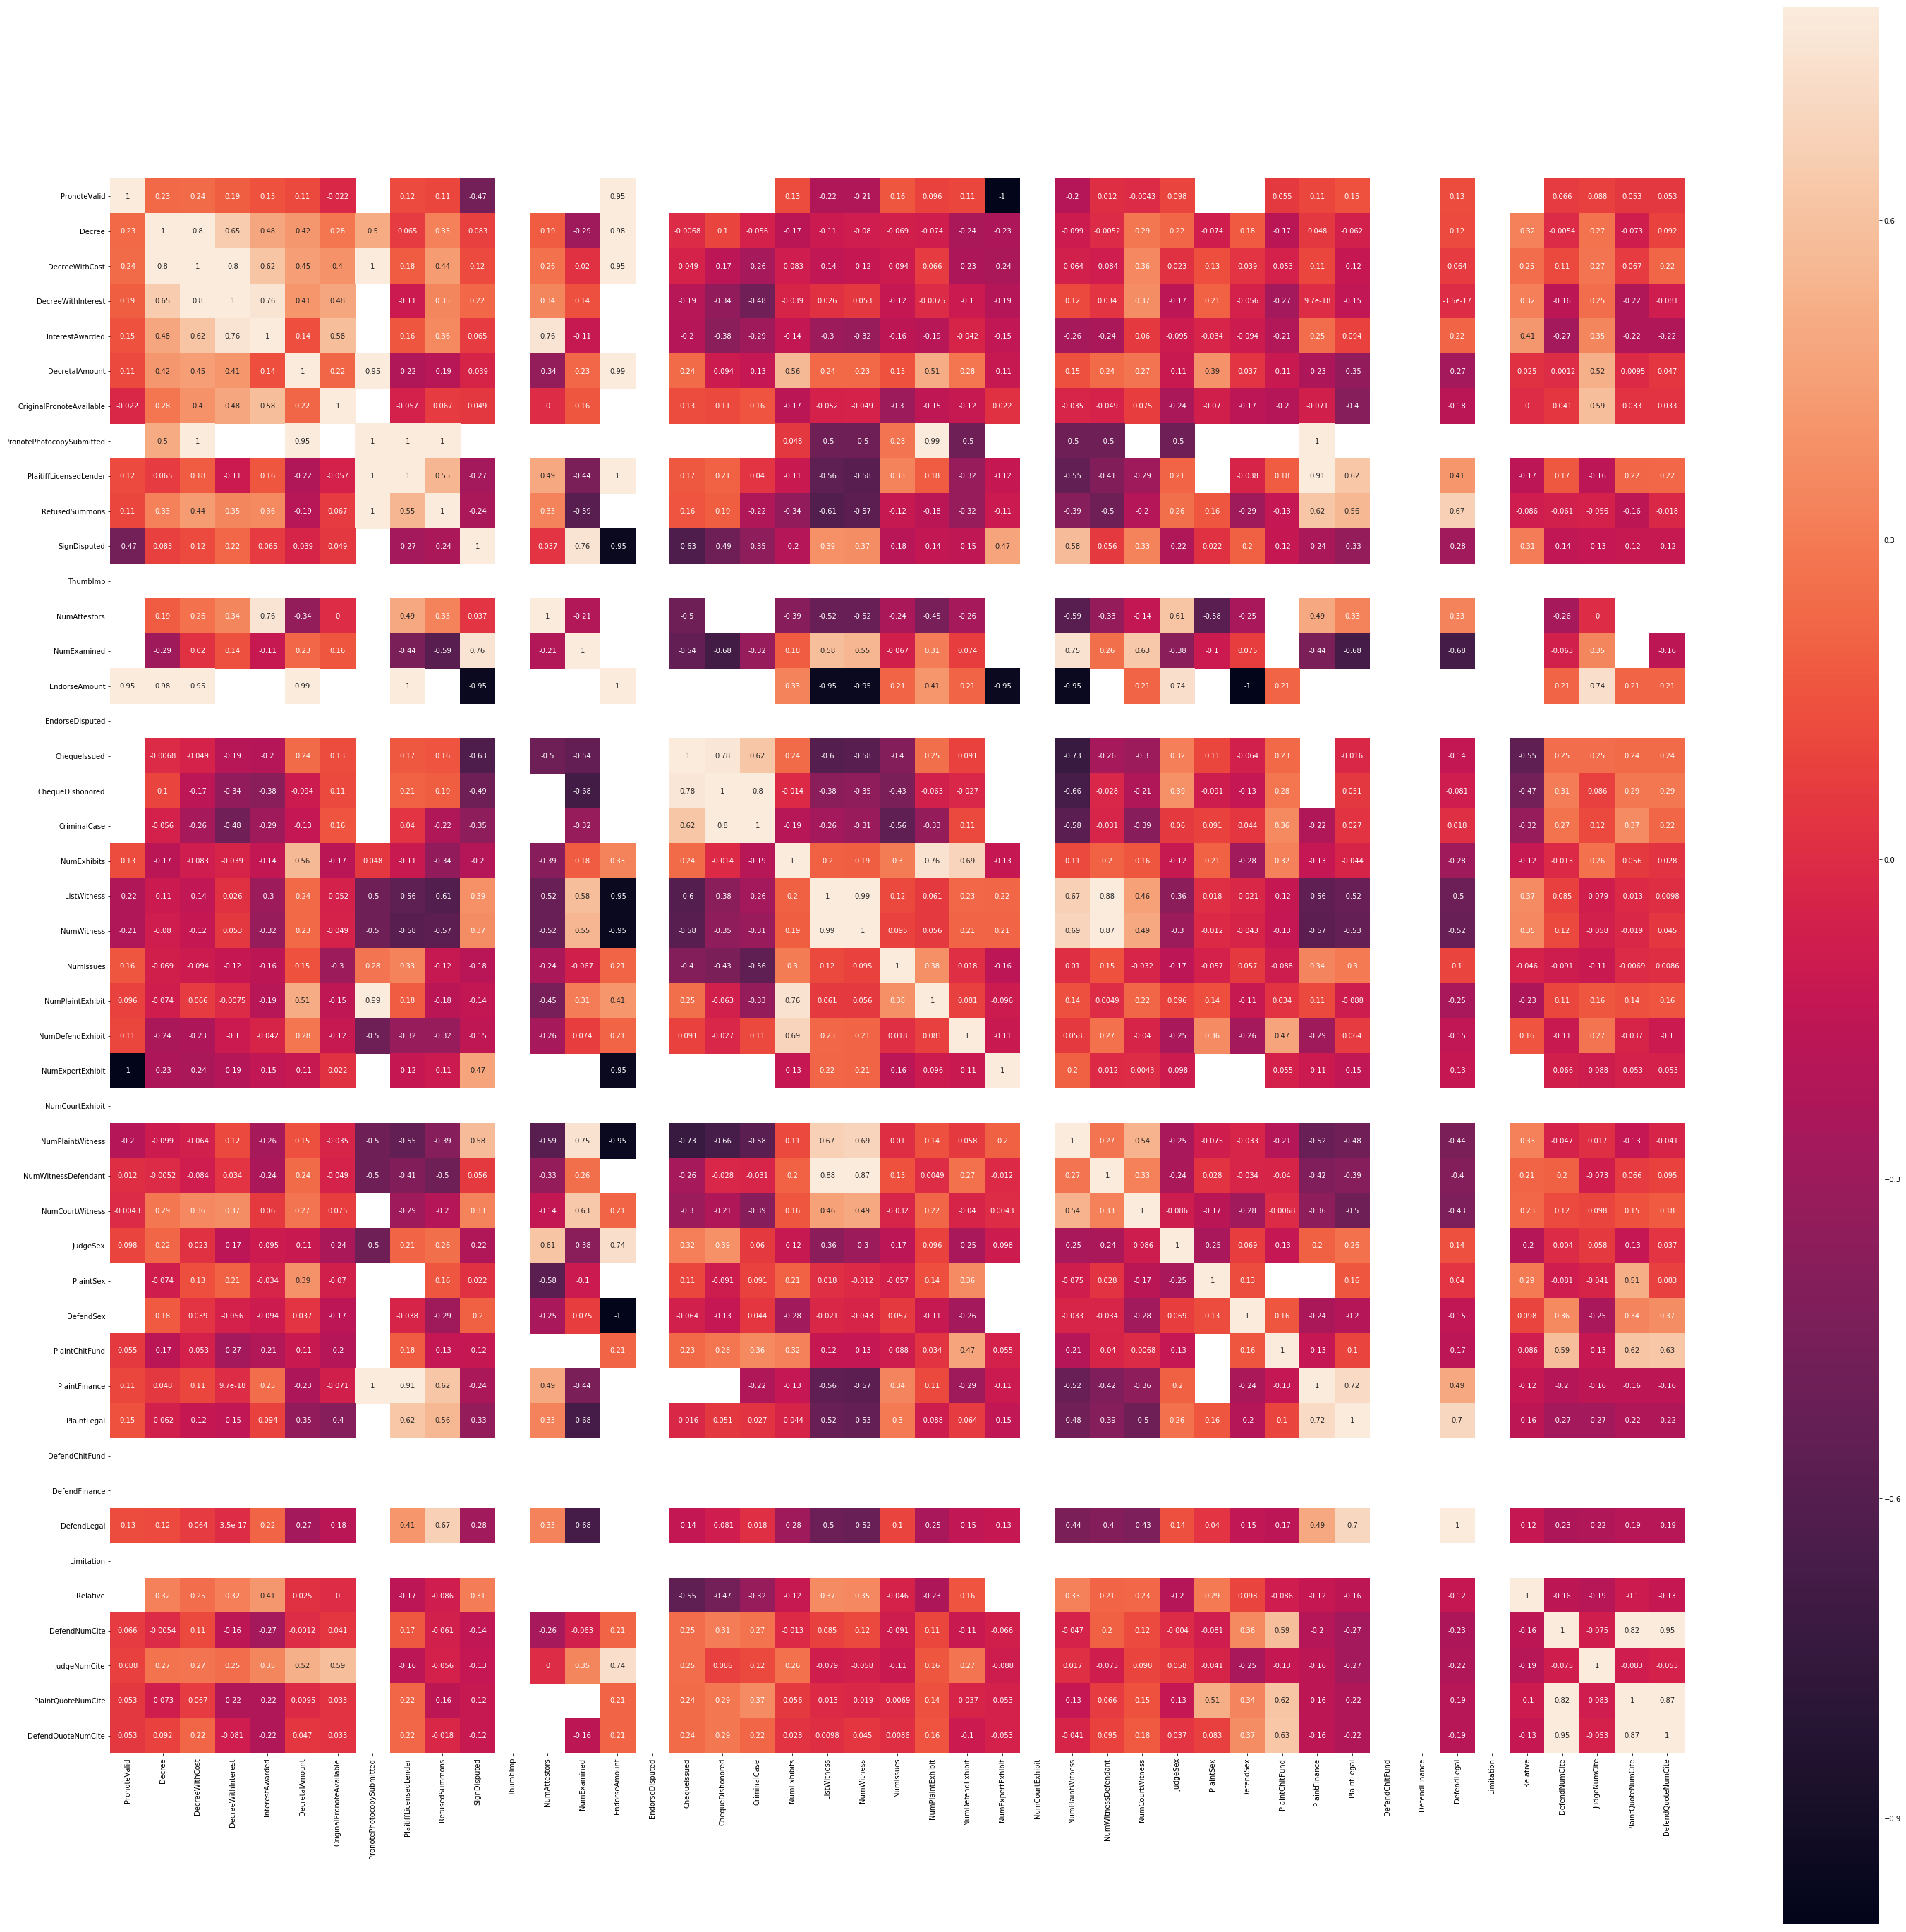

In [9]:
corrmat = dataset.corr(method='pearson')
f, ax = pyplot.subplots(figsize = (50,50))
sn.heatmap(corrmat, vmax=0.8, square=True, annot=True)

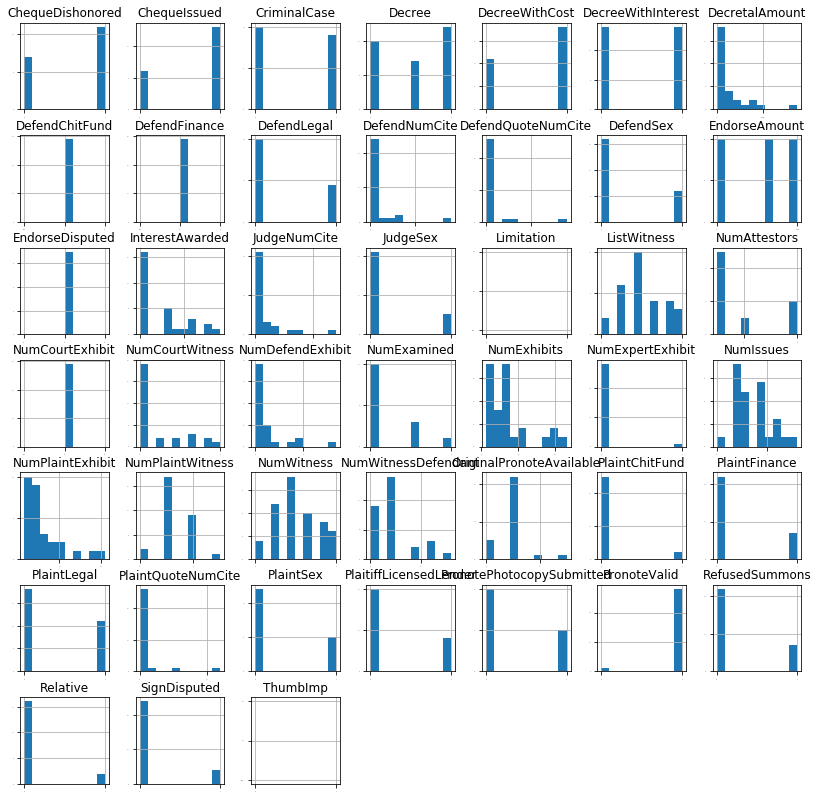

In [10]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1 ,figsize=(14,14))
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1364: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1364: RuntimeWarning: All-NaN axis encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1365: RuntimeWarning: All-NaN axis encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1366: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


ValueError: `dataset` input should have multiple elements.

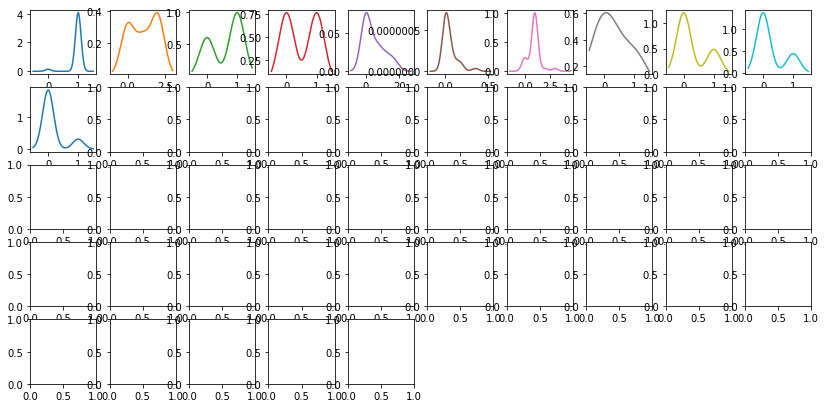

In [12]:
# density
dataset.plot(kind='density', subplots=True, layout=(10,10), sharex=False, legend=True, fontsize=1, figsize=(14,14))
pyplot.show()

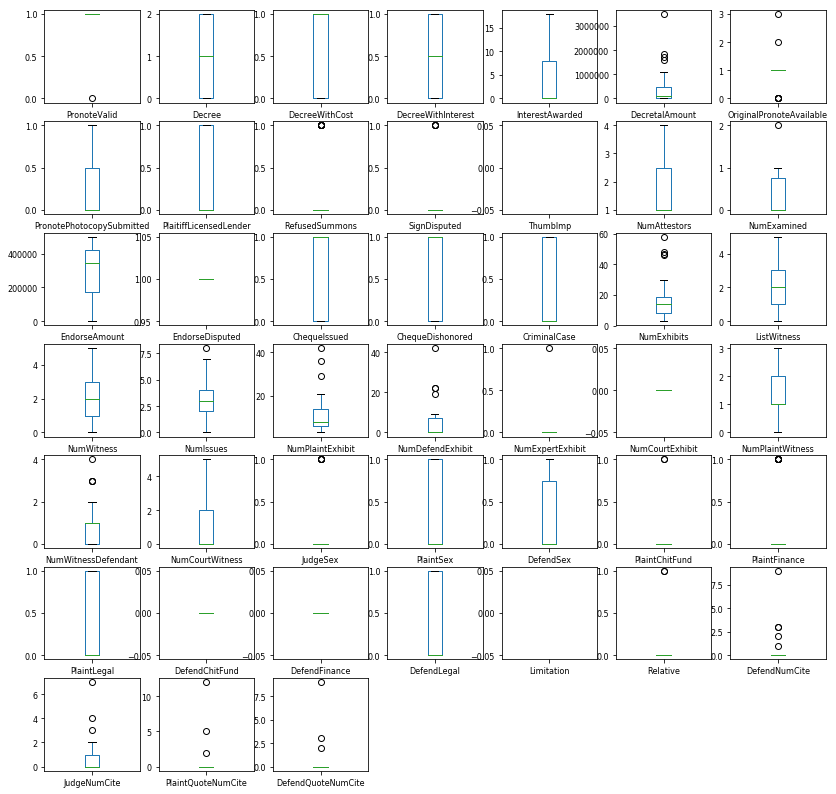

In [15]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, fontsize=8, figsize=(14,14))
pyplot.show()

ValueError: zero-size array to reduction operation minimum which has no identity

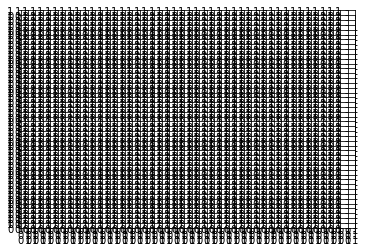

In [17]:
# scatter plot matrix
scatter_matrix(dataset)
#f, ax = pyplot.subplots(figsize = (14,14))
pyplot.show()

In [19]:
print('Any Missing Values:')
print(dataset.isnull().sum())

Any Missing Values:
PronoteValid                  0
Decree                        0
DecreeWithCost                0
DecreeWithInterest            1
InterestAwarded               0
DecretalAmount                0
OriginalPronoteAvailable      0
PronotePhotocopySubmitted    26
PronoteDate                   9
CaseFilingDate                2
PronoteAmount                 0
InterestAmount                0
BorrowingReason              17
PlaitiffLicensedLender        1
RefusedSummons                0
SignDisputed                  1
ThumbImp                     29
NumAttestors                 21
NumExamined                  15
Scribe                       27
EndorseAmount                26
EndorseDate                  23
EndorseDisputed              22
ChequeIssued                 10
ChequeDishonored             11
CriminalCase                 10
NumExhibits                   0
ListWitness                   0
NumWitness                    0
NumIssues                     0
                    